In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('datasets/clean_datasets.csv')
df.head()

,size,bath,balcony,price,per_sqft,price_per_sqft,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2.0,2.0,1.0,39.07,528.0,3699.810606,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,5.0,3.0,120.00,650.0,4615.384615,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2.0,3.0,62.00,480.0,4305.555556,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,1.0,95.00,507.0,6245.890861,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,2.0,1.0,51.00,600.0,4250.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x = df.drop(columns=['price'])  # Features (all columns except 'price')
y = df['price'] 

In [ ]:
x['per_sqft'] = np.log1p(x['per_sqft'])
x['price_per_sqft'] = np.log1p(x['price_per_sqft'])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
x_train.shape

(7030, 254)

In [43]:
type(x_train)

pandas.core.frame.DataFrame

In [6]:
# Train Model Function (updated for regression)
def train_model(model, model_name, x_train, y_train, x_test, y_test, is_classification=True):
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Collecting results in a dictionary
    model_results = {
        'model': model_name
    }
    
    if is_classification:
        # Classification metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        model_results['train_accuracy'] = train_accuracy
        model_results['test_accuracy'] = test_accuracy
        
        # Generate classification report for testing data (optional)
        report = classification_report(y_test, y_test_pred, output_dict=True)
        model_results['classification_report'] = report
    else:
        # Regression metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        model_results['train_mse'] = train_mse
        model_results['test_mse'] = test_mse
        model_results['train_r2'] = train_r2
        model_results['test_r2'] = test_r2
    
    return model_results

# List of models (for regression or classification tasks)
model_list = dict(
    linear_regression=LinearRegression(),
    ridge=Ridge(alpha=1.0),
    lasso=Lasso(alpha=0.1),
    svr=SVR(kernel='rbf'),
    decision_tree=DecisionTreeRegressor(random_state=42),
    random_forest=RandomForestRegressor(n_estimators=50, random_state=42),
    xgboost=xgb.XGBRegressor(max_depth=1),
    gradientboost=GradientBoostingRegressor(n_estimators=100, random_state=42),
    adaboost=AdaBoostRegressor(n_estimators=100, random_state=42),  # Added AdaBoost
)

# Assume you have your x_train, x_test, y_train, and y_test already defined
results = []
for key, value in model_list.items():
    # Check if classification or regression model and train accordingly
    is_classification =False  # change as per your use-case for classification vs regression
    model_results = train_model(value, key, x_train, y_train, x_test, y_test, is_classification)
    results.append(model_results)

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Print or return the results DataFrame
results_df

,model,train_mse,test_mse,train_r2,test_r2
0,linear_regression,1238.050536,1363.221873,0.878964,0.855110
1,ridge,1238.050767,1363.009469,0.878964,0.855133
2,lasso,1240.536992,1352.507921,0.878721,0.856249
3,svr,7755.630351,6800.693374,0.241785,0.277191
4,decision_tree,0.000000,467.708878,1.000000,0.950290
5,random_forest,51.980401,206.987126,0.994918,0.978000
6,xgboost,937.635024,899.104290,0.908334,0.904439
7,gradientboost,70.822589,146.659236,0.993076,0.984412
8,adaboost,6992.157520,7068.890144,0.316424,0.248686


In [7]:
model=xgb.XGBRegressor(max_depth=1)
model.fit(x_train, y_train)
# Predictions on the training data
y_train_pred = model.predict(x_train)
# Predictions on the testing data
y_test_pred = model.predict(x_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print('train_r2',train_r2)
print('test_r2',test_r2)

train_r2 0.9083337977550651
test_r2 0.9044390454961065


In [8]:
model.predict(x[2].reshape(1,-1))

array([50.43488], dtype=float32)

Epoch 1/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 16387.0039 - mae: 82.0990 - val_loss: 8817.7109 - val_mae: 54.5785
Epoch 2/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8989.5977 - mae: 56.0295 - val_loss: 7395.6338 - val_mae: 52.7824
Epoch 3/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 7136.5493 - mae: 47.7842 - val_loss: 5493.2261 - val_mae: 43.2589
Epoch 4/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5871.1987 - mae: 41.9303 - val_loss: 4584.3955 - val_mae: 40.1777
Epoch 5/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5010.2598 - mae: 38.8394 - val_loss: 4368.8369 - val_mae: 39.4500
Epoch 6/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5310.4429 - mae: 39.0821 - val_loss: 4404.5947 - val_mae: 36.9259
Epoch 7/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5411.6841 - mae: 37.4856 - val_loss: 4117.8408 - val_mae: 37.5783
Epoch 8/100
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4687.9917 - mae: 35.6287 - val_loss: 4030.9797

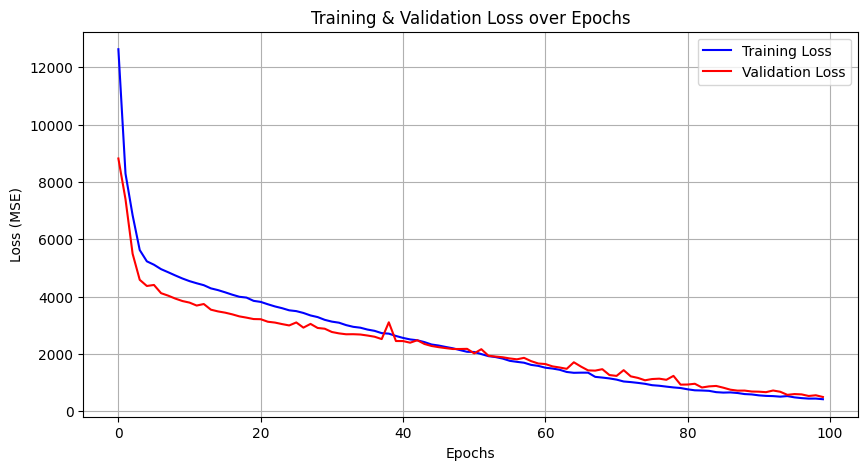

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and store history
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Predict on test data
y_pred = model.predict(x_test)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score on Test Set: {r2:.4f}")

# Plot Training Loss & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training & Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

In [46]:
def predict(x_value,y_value):
    print('actual:',y_value)
    print('predicted : ',np.array(model.predict(x_value)).flatten()[0])

In [47]:
x.iloc[2,:].values.reshape(1,-1)

array([[3.        , 2.        , 3.        , 6.17586727, 8.36789369,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [48]:
predict(x.iloc[2,:].values.reshape(1,-1),y[2])

actual: 62.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
predicted :  68.486786


In [49]:
predict(x.iloc[3,:].values.reshape(1,-1),y[3])

actual: 95.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
predicted :  92.53852


In [50]:
predict(x.iloc[4,:].values.reshape(1,-1),y[4])

actual: 51.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted :  45.30361


In [51]:
predict(x.iloc[6,:].values.reshape(1,-1),y[6])

actual: 63.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
predicted :  54.658875


In [55]:
predict(x.iloc[11,:].values.reshape(1,-1),y[11])

actual: 148.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
predicted :  147.10588


In [56]:
# Save model (folder format)
model.save('regression_model.h5')  # HDF5 format


In [34]:
columns=df.columns

In [35]:
print(columns)

Index(['size', 'bath', 'balcony', 'price', 'per_sqft', 'price_per_sqft',
       'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=255)


In [36]:
columns[6:]

Index(['area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'availability_On Date', 'availability_Ready To Move',
       'location_ Devarachikkanahalli', 'location_1st Block Jayanagar',
       'location_1st Block Koramangala', 'location_1st Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=249)

In [30]:
area_columns = [col.split('area_type_')[1] for col in columns if col.startswith('area_')]
print(area_columns)

['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area']


In [32]:
location_columns = [col.split('location_')[1].strip() for col in columns if col.startswith('location_')]
print(location_columns)

['Devarachikkanahalli', '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar', '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Balagere', 'Banashankari', 'Banashankari Stage II', 'Banashankari Stage III', 'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli', 'Bommanahalli', 'Bommasandra', 'Bommasandra Industrial Area', 'Bommenahalli', 'Brookefield', 'Budigere', 'CV Raman Nagar', 'Chamrajpet', 'Chandapura', 'Channasandr

In [33]:
availability_columns = [col.split('availability_')[1].strip() for col in columns if col.startswith('availability_')]
print(availability_columns)

['On Date', 'Ready To Move']


In [ ]:
data={
    'area_type_':area_columns,
    'location_':location_columns,
    'availability_':availability_columns
}

In [35]:
import json
# Write to a JSON file
with open("property_data.json", "w") as file:
    json.dump(data, file, indent=4)

print("JSON file created successfully!")

JSON file created successfully!
